In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/capstone

/content/drive/MyDrive/capstone


In [ ]:
pwd

'/content/drive/MyDrive/capstone'

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
%cd /content/drive/MyDrive/capstone/dataset_ori/image/0
%ls -l | grep ^- | wc -l
%cd /content/drive/MyDrive/capstone/dataset_ori/image/1
%ls -l | grep ^- | wc -l
%cd /content/drive/MyDrive/capstone/dataset_ori/image/2
%ls -l | grep ^- | wc -l
%cd /content/drive/MyDrive/capstone/dataset_ori/image/3
%ls -l | grep ^- | wc -l
%cd /content/drive/MyDrive/capstone/dataset_ori/image/4
%ls -l | grep ^- | wc -l
%cd /content/drive/MyDrive/capstone/dataset_ori/image/5
%ls -l | grep ^- | wc -l
%cd /content/drive/MyDrive/capstone/dataset_ori/image/6
%ls -l | grep ^- | wc -l
%cd /content/drive/MyDrive/capstone/dataset_ori/image/7
%ls -l | grep ^- | wc -l
%cd /content/drive/MyDrive/capstone/dataset_ori/image/8
%ls -l | grep ^- | wc -l
%cd /content/drive/MyDrive/capstone/dataset_ori/image/9
%ls -l | grep ^- | wc -l
%cd /content/drive/MyDrive/capstone/dataset_ori/image/10
%ls -l | grep ^- | wc -l
%cd /content/drive/MyDrive/capstone/dataset_ori/image/11
%ls -l | grep ^- | wc -l
%cd /content/drive/MyDrive/capstone/dataset_ori/image/12
%ls -l | grep ^- | wc -l
%cd /content/drive/MyDrive/capstone/dataset_ori/image/13
%ls -l | grep ^- | wc -l
%cd /content/drive/MyDrive/capstone/dataset_ori/image/14
%ls -l | grep ^- | wc -l
%cd /content/drive/MyDrive/capstone/dataset_ori/image/15
%ls -l | grep ^- | wc -l

/content/drive/MyDrive/capstone/dataset_ori/image/0
219
/content/drive/MyDrive/capstone/dataset_ori/image/1
232
/content/drive/MyDrive/capstone/dataset_ori/image/2
263
/content/drive/MyDrive/capstone/dataset_ori/image/3
241
/content/drive/MyDrive/capstone/dataset_ori/image/4
230
/content/drive/MyDrive/capstone/dataset_ori/image/5
237
/content/drive/MyDrive/capstone/dataset_ori/image/6
178
/content/drive/MyDrive/capstone/dataset_ori/image/7
211
/content/drive/MyDrive/capstone/dataset_ori/image/8
221
/content/drive/MyDrive/capstone/dataset_ori/image/9
229
/content/drive/MyDrive/capstone/dataset_ori/image/10
190
/content/drive/MyDrive/capstone/dataset_ori/image/11
271
/content/drive/MyDrive/capstone/dataset_ori/image/12
211
/content/drive/MyDrive/capstone/dataset_ori/image/13
232
/content/drive/MyDrive/capstone/dataset_ori/image/14
273
/content/drive/MyDrive/capstone/dataset_ori/image/15
215


In [ ]:
cd /content/drive/MyDrive/capstone

/content/drive/MyDrive/capstone


In [2]:
import matplotlib.pyplot as plt
import urllib.request
import os
import zipfile
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from shutil import copyfile

In [ ]:
import random
from shutil import copyfile
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    print(f'{training_length}, {testing_length}')
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[training_length:]

    for filename in training_set:
        print(f'filename: {filename}')
        this_file = SOURCE + filename
        destination = TRAINING + filename
        print(f'this_file: {this_file}')
        print(f'destination: {destination}')
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


split_size = .9

for i in range(16):
  SOURCE_DIR = "./dataset_ori/image/{}/".format(i)
  TRAINING_DIR = "./dataset/training/image/{}/".format(i)
  TESTING_DIR = "./dataset/testing/image/{}/".format(i)
  split_data(SOURCE_DIR, TRAINING_DIR, TESTING_DIR, split_size)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
filename: 7_101.jpg
this_file: ./dataset_ori/image/7/7_101.jpg
destination: ./dataset/training/image/7/7_101.jpg
filename: 7_97.jpg
this_file: ./dataset_ori/image/7/7_97.jpg
destination: ./dataset/training/image/7/7_97.jpg
filename: 7_188.jpg
this_file: ./dataset_ori/image/7/7_188.jpg
destination: ./dataset/training/image/7/7_188.jpg
filename: 7_85.jpg
this_file: ./dataset_ori/image/7/7_85.jpg
destination: ./dataset/training/image/7/7_85.jpg
filename: 7_126.jpg
this_file: ./dataset_ori/image/7/7_126.jpg
destination: ./dataset/training/image/7/7_126.jpg
filename: 7_56.jpg
this_file: ./dataset_ori/image/7/7_56.jpg
destination: ./dataset/training/image/7/7_56.jpg
filename: 7_202.jpg
this_file: ./dataset_ori/image/7/7_202.jpg
destination: ./dataset/training/image/7/7_202.jpg
filename: 7_83.jpg
this_file: ./dataset_ori/image/7/7_83.jpg
destination: ./dataset/training/image/7/7_83.jpg
filename: 7_41.jpg
this_file: ./dataset_ori/image/7/7_41.jpg
destination

In [ ]:
TRAINING_DIR = "./dataset/training/image/"
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=0, 
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0,  
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))

VALIDATION_DIR = "./dataset/testing/image/"

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=64,
                                                              class_mode='categorical',
                                                              target_size=(224, 224))

Found 3279 images belonging to 16 classes.
Found 374 images belonging to 16 classes.


In [3]:
from keras import applications
model = applications.vgg16.VGG16(weights='imagenet', include_top=False,  input_shape=(224, 224, 3))

model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [4]:
model.trainable=False

global_average_layer = layers.Flatten()

prediction_layer = tf.keras.Sequential([layers.Dense(2048, activation = 'relu'),
                                        layers.Dropout(0.5),
                                        layers.Dense(16, activation = 'softmax')])

model = tf.keras.Sequential([
    model,
    global_average_layer,
    prediction_layer
])

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 sequential (Sequential)     (None, 16)                51415056  
                                                                 
Total params: 66,129,744
Trainable params: 51,415,056
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='final_pretrained_VGG_weight_0603.hdf5', 
            monitor='loss', 
            mode='min', 
            save_best_only=True)

# compile the model
model.compile(optimizer=RMSprop(lr=1e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

# train the model (adjust the number of epochs from 1 to improve performance)
history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=150,
            callbacks=[checkpoint])
model.save('final_cap_model_0603.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
Epoch 1/150
52/52 [==============================] - 1048s 20s/step - loss: 2.0520 - acc: 0.3769 - val_loss: 0.9526 - val_acc: 0.8369
Epoch 2/150
52/52 [==============================] - 51s 983ms/step - loss: 1.1039 - acc: 0.6987 - val_loss: 0.4850 - val_acc: 0.9091
Epoch 3/150
52/52 [==============================] - 52s 991ms/step - loss: 0.7193 - acc: 0.8033 - val_loss: 0.3152 - val_acc: 0.9465
Epoch 4/150
52/52 [==============================] - 53s 1s/step - loss: 0.5339 - acc: 0.8536 - val_loss: 0.2295 - val_acc: 0.9519
Epoch 5/150
52/52 [==============================] - 52s 998ms/step - loss: 0.4203 - acc: 0.8914 - val_loss: 0.1674 - val_acc: 0.9706
Epoch 6/150
52/52 [==============================] - 52s 992ms/step - loss: 0.3571 - acc: 0.9036 - val_loss: 0.1380 - val_acc: 0.9813
Ep

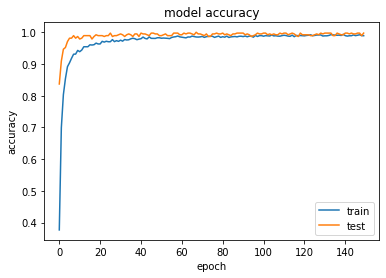

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

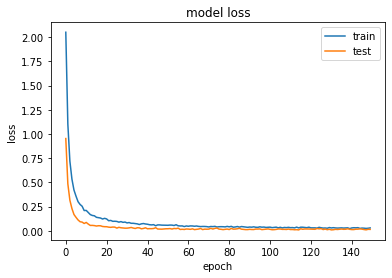

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper right')
plt.show()